# Project Group - 

Members: 
Fleur de Boer, Bastiaan van der Hoeven, Laetitia Molkenboer, Pim van der Velde, Alfareeq Rosan

Student numbers: 
4786297, x, 4553934, 4569857, x

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

Through the years the amount of physical stores is getting smaller due to the rise of webshops (Weltevreden, 2012). To see if the effects are declarable, different questions will be formulated. Chosen is to do an application project, because this could show any connections between the different kind of purchasing through the years. 

In this project the research question "How did online shopping affect the number of physical stores in the Netherlands?"  will be discussed and examined. The physical stores are divided in different categories:
- Clothing and sporting goods
- Books, Magazines and Newspapers
- Household goods and appliances
- Electronic devices and supplies (software & hardware)

These categories are chosen to answer the following sub-question: 'Which different types of retail are more sensitive as a result of ecommerce?' Different plots will be computed to give a clear insight in the relations between certain aspects. The specific relations in the plots will be discussed below. 

The last question that will be discussed is: 'Which province in the Netherlands experienced the biggest change of the amount of physical stores over time?'

To answer these questions the following plots will be made and discussed:
- Overview of the population growth through the years
- Diagram that shows the decrease in physical stores and the increase of online purchases
- Animation through the years to show how the online and physical stores increased and decreased
- Heatmap of the Netherlands to show which provinces are sensitive


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1: Fleur de Boer**: Introduction and overview of population growth

**Author 2: Bastiaan van der Hoeven**:

**Author 3: Laetitia Molkenboer**: Plots of online purchases versus physical stores for all 4 categories

**Author 4: Pim van der Velde**: Heatmap of the Netherlands to show which provinces are most sensitive to change

**Author 5: Alfareeq**:

# Data Used

For the execution of this programming project, three datasets were used. These are the following:

1.	Online shopping dataset: 
https://www.cbs.nl/nl-nl/cijfers/detail/83430NED 
2.	Physical stores in The Netherlands:
https://opendata.cbs.nl/statline/#/CBS/nl/dataset/81578NED/table?dl=2E131 
3.	Population distribution by age:
https://opendata.cbs.nl/statline/#/CBS/nl/dataset/7461BEV/table?fromstatweb 

The first dataset contains the percentages of Dutch civilians above the age of 11 that purchase goods online. The dataset contains percentages for different categories. The first column contains the total percentages of people buying online. The other columns show the percentages of people buying specific goods. Since this dataset only gives percentages, the third dataset is used to quantify the percentages of people above 12 years old to a number of people above 12 years old. The following categories of this dataset have been used in this programming assignment:

- Total online purchases
- Clothes or sportarticles
- Books, magazines and papers
- Soft-/hardware and electronics	
- Household goods and devices	

The second dataset contains all numbers of physical establishments of companies in the Netherlands. This varies from energy plants to greenhouses and from flower stores to car manufacturers. For this assignment we are only interested in stores that comply with the categories of the first dataset. The list below shows in brackets which types of stores from this second dataset were preprocessed over the 4 categories of the first dataset.

1. Clothes or sportarticles (Winkels in watersportartikelen, Winkels in sportartikelen, Winkels in kleding & Winkels in schoenen en lederwaren)
2. Books, magazines and papers (Boekenwinkels, Winkels in lectuur en schrijfwaren)
3. Soft-/hardware and electronics (Winkels in consumentenelektronica, Winkels in computers en software, Winkels in communicatieapparatuur)	
4. Household goods and devices (Winkels in wit- en bruingoed; Winkels elektr. huishoudapparatuur)


# Data Pipeline


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
#Plot 1: Plot to see the population growth through the years

population = (r"Data_stores\Bevolking.csv")

df = pd.read_csv(population, delimiter = ';')
df.iloc[0:8]

,year,population 12+
0,2012,14453963
1,2013,14534450
2,2014,14615104
3,2015,14710310
4,2016,14812838
5,2017,14927830
6,2018,15036742
7,2019,15149650


In [4]:
fig = px.bar(df,
             x = 'year',
             y = 'population 12+',
             title = 'Population growth',
             color = 'year',
             text = 'population 12+',
)
fig.show()

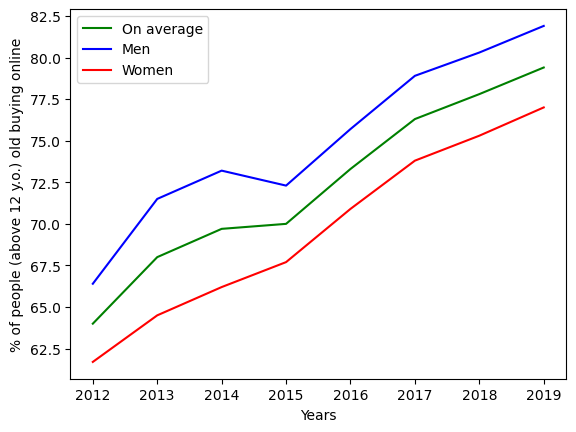

In [5]:
t = pd.read_csv('Data_online_shopping_total.csv', delimiter = ';', index_col = 0)
m = pd.read_csv('Data_online_shopping_men.csv', delimiter = ';', index_col = 0)
w = pd.read_csv('Data_online_shopping_women.csv', delimiter = ';', index_col = 0)

t['Totaal online aankopen'].plot(color = 'g', label = 'On average')
m['Totaal online aankopen'].plot(color = 'b', label = 'Men')
w['Totaal online aankopen'].plot(color = 'r', label = 'Women')

plt.xlabel('Years')
plt.ylabel('% of people (above 12 y.o.) old buying online')
plt.legend()

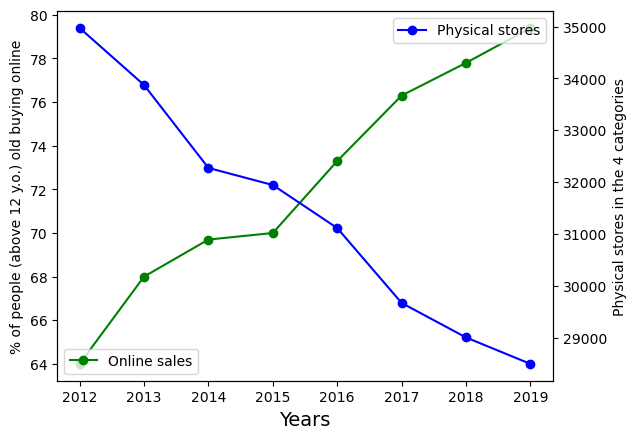

In [9]:
file_path = (r"Stores_country_data.csv")
df = pd.read_csv(file_path, delimiter=';')
x = df['Perioden']
y1 = df['1. Kleding of sportartikelen'] + df['2. Boeken, tijdschriften en kranten'] + df['3. Soft-/ hardware en elektronische benodig'] + df['4. Huishoudelijke goederen en apparaten']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
line1 = ax.plot(t['Totaal online aankopen'], marker="o", label = 'Online sales', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('% of people (above 12 y.o.) old buying online',fontsize=10)
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y1,marker="o", label = 'Physical stores', color = 'b')
ax2.set_ylabel("Physical stores in the 4 categories",fontsize=10)
#plt.legend([ax,ax2],['label1','label2'])
ax2.legend()
plt.show()

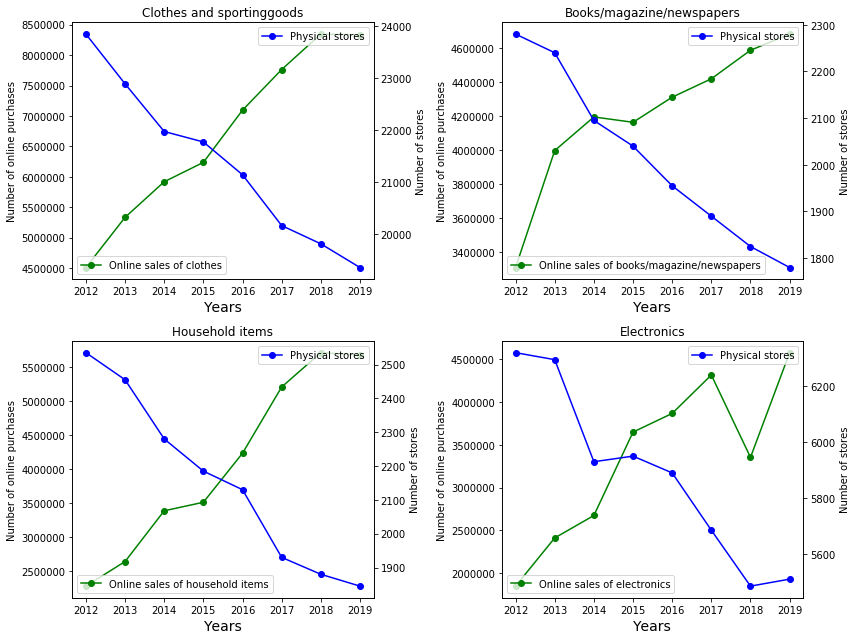

In [4]:
file_path2 = (r"Data_online_shopping_population.csv")
df2 = pd.read_csv(file_path2, delimiter=';')

###################################################################################

fig = plt.figure(figsize=(12, 9))
gs = fig.add_gridspec(nrows=2, ncols=2)

######################Clothes graph#########################

ax = fig.add_subplot(gs[0,0])
x = df['Perioden']
y00 = df['1. Kleding of sportartikelen']
y01 = df2['Kleding of sportartikelen']

line1 = ax.plot(x, y01, marker="o", label = 'Online sales of clothes', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('Number of online purchases',fontsize=10)
ax.set_title('Clothes and sportinggoods')
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y00,marker="o", label = 'Physical stores', color = 'b')
ax2.set_ylabel("Number of stores",fontsize=10)

ax2.legend()

#####################Books graph######################################

ax = fig.add_subplot(gs[0,1])
y10 = df['2. Boeken, tijdschriften en kranten']
y11 = df2['Boeken, tijdschriften en kranten']

line1 = ax.plot(x, y11, marker="o", label = 'Online sales of books/magazine/newspapers', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('Number of online purchases',fontsize=10)
ax.set_title('Books/magazine/newspapers')
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y10,marker="o", label = 'Physical stores', color = 'b')
ax2.set_ylabel("Number of stores",fontsize=10)

ax2.legend()
#####################################Electronics graph##################################################################

ax = fig.add_subplot(gs[1,1])
y20 = df['3. Soft-/ hardware en elektronische benodig']
y21 = df2['Soft-/ hardware en elektronische benodig']

line1 = ax.plot(x, y21, marker="o", label = 'Online sales of electronics', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('Number of online purchases',fontsize=10)
ax.set_title('Electronics')
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y20,marker="o", label = 'Physical stores', color = 'b')
ax2.set_ylabel("Number of stores",fontsize=10)

ax2.legend()

####################################Household goods graph###################################################

ax = fig.add_subplot(gs[1,0])
y30 = df['4. Huishoudelijke goederen en apparaten']
y31 = df2['Huishoudelijke goederen en apparaten']

line1 = ax.plot(x, y31, marker="o", label = 'Online sales of household items', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('Number of online purchases',fontsize=10)
ax.set_title('Household items')
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y30,marker="o", label = 'Physical stores', color = 'b')
ax2.set_ylabel("Number of stores",fontsize=10)

ax2.legend()

##########################################################################
plt.tight_layout()
plt.show()

# Bibliography

Weltevreden, J. W. J. (2012). De evolutie van online winkelen in Nederland. Hogeschool van
Amsterdam.